# **IMPORTING NECESSARY LIBRARIES**

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

**IMPORTING DATASET**

In [134]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding='latin-1')

In [135]:
df=df.iloc[:,:2]

In [136]:
df=df.rename(columns={"v1":"label","v2":"text"})
df

label                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [137]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

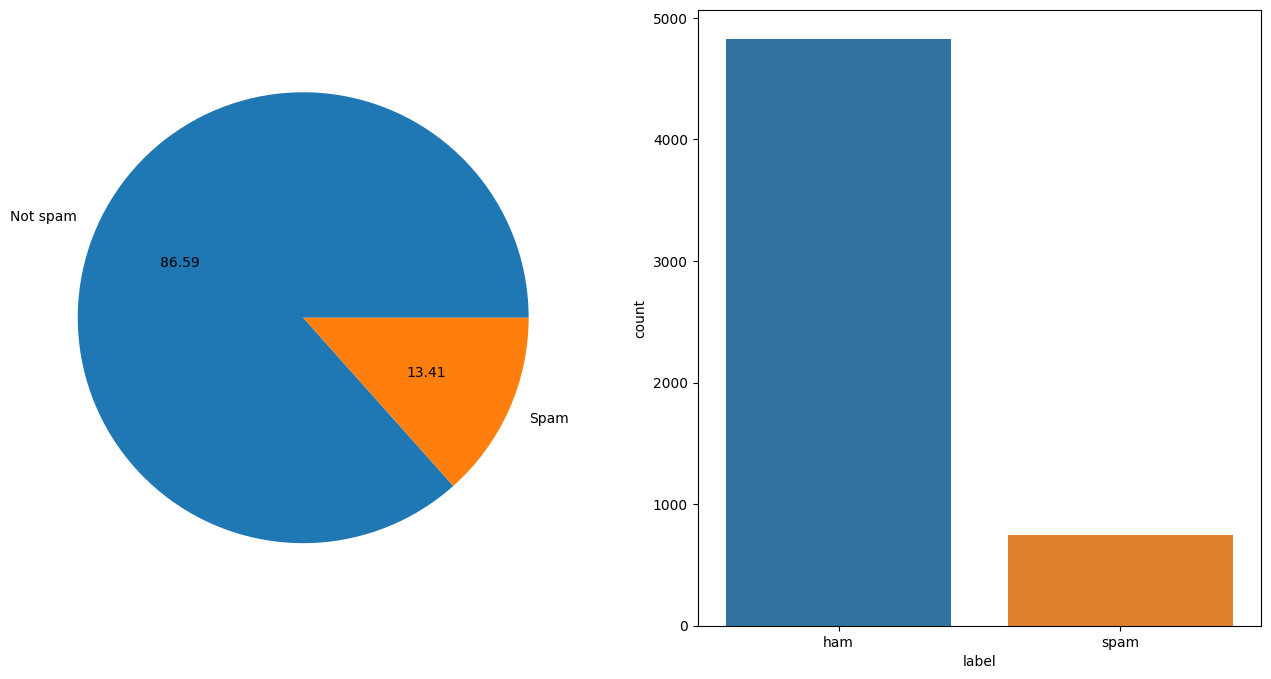

In [138]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.pie(df['label'].value_counts(),labels=['Not spam','Spam'],autopct="%0.2f")
plt.subplot(1,2,2)
sns.barplot(x=df['label'].value_counts().index,y=df['label'].value_counts(),data=df)
plt.show()

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [140]:
df.shape

(5572, 2)

In [141]:
df.isnull().sum()

label    0
text     0
dtype: int64

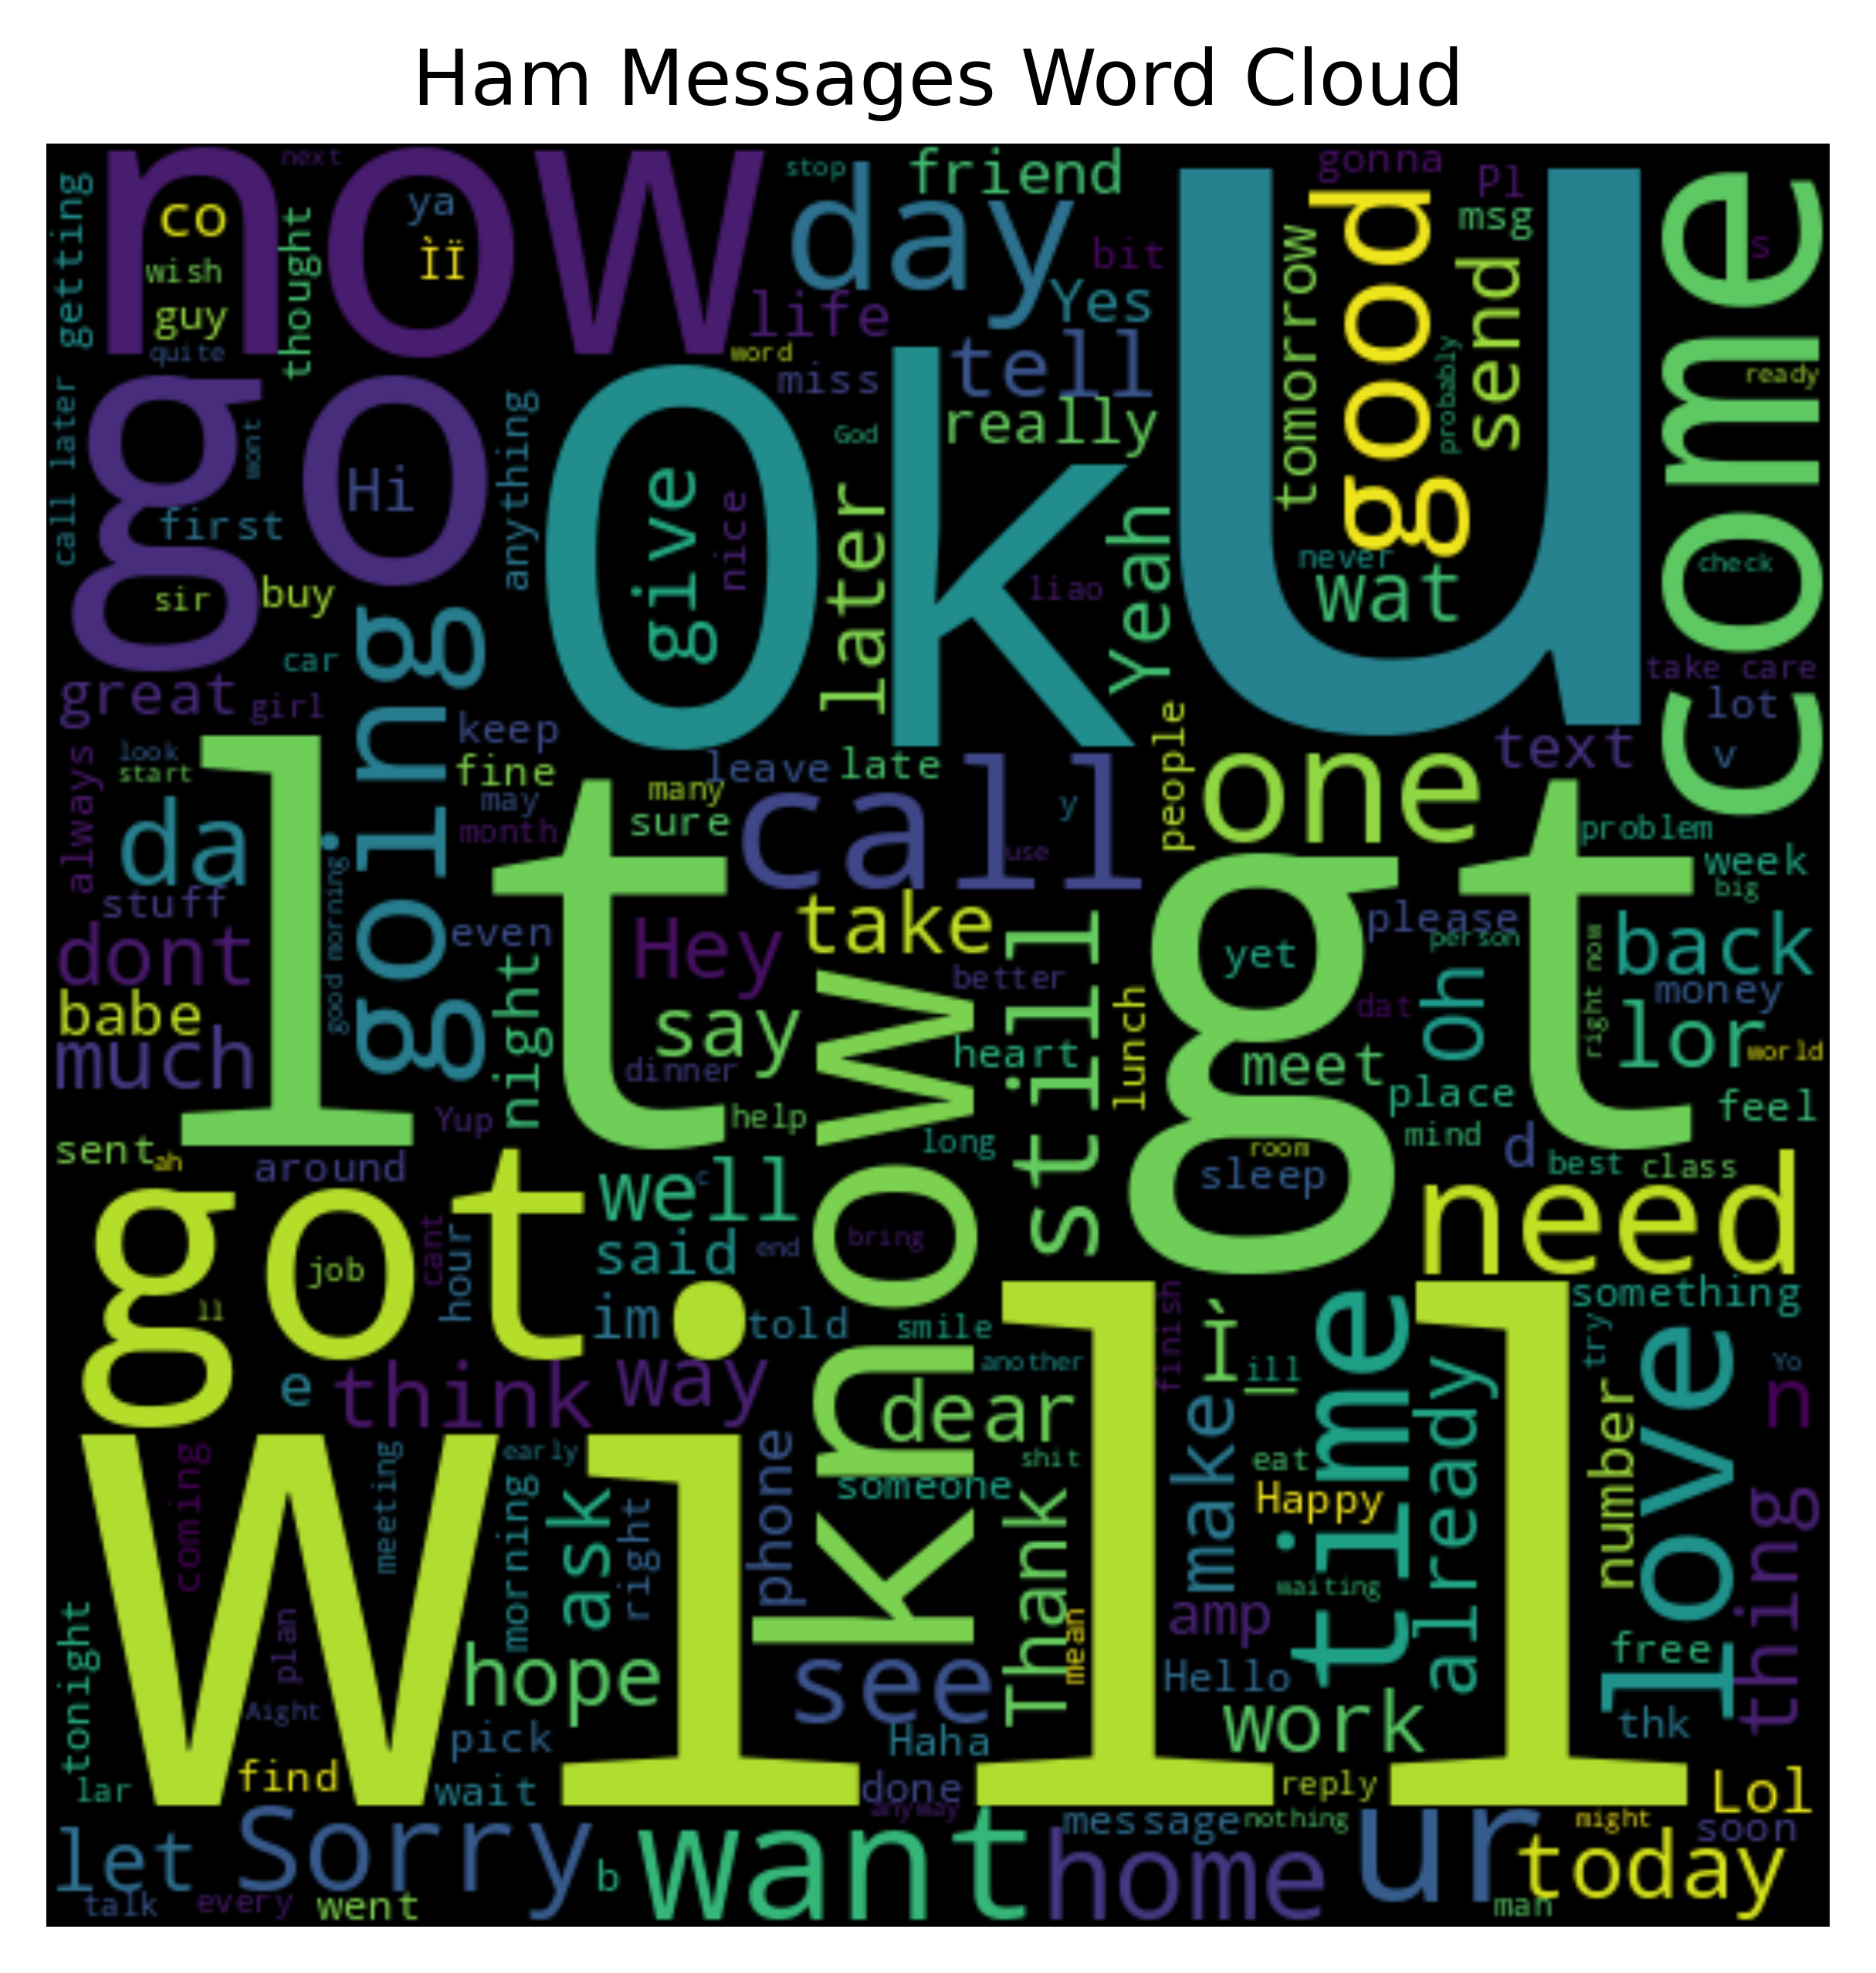

In [142]:
ham_text = " ".join(df[df['label'] == 'ham']['text'])
spam_text = " ".join(df[df['label'] == 'spam']['text'])

ham_wordcloud = WordCloud(width=500, height=500).generate(ham_text)
spam_wordcloud = WordCloud(width=500, height=500).generate(spam_text)

ham_image = ham_wordcloud.to_array()
spam_image = spam_wordcloud.to_array()

plt.figure(figsize=(10,5), dpi=600)
plt.imshow(ham_image, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')
plt.show()

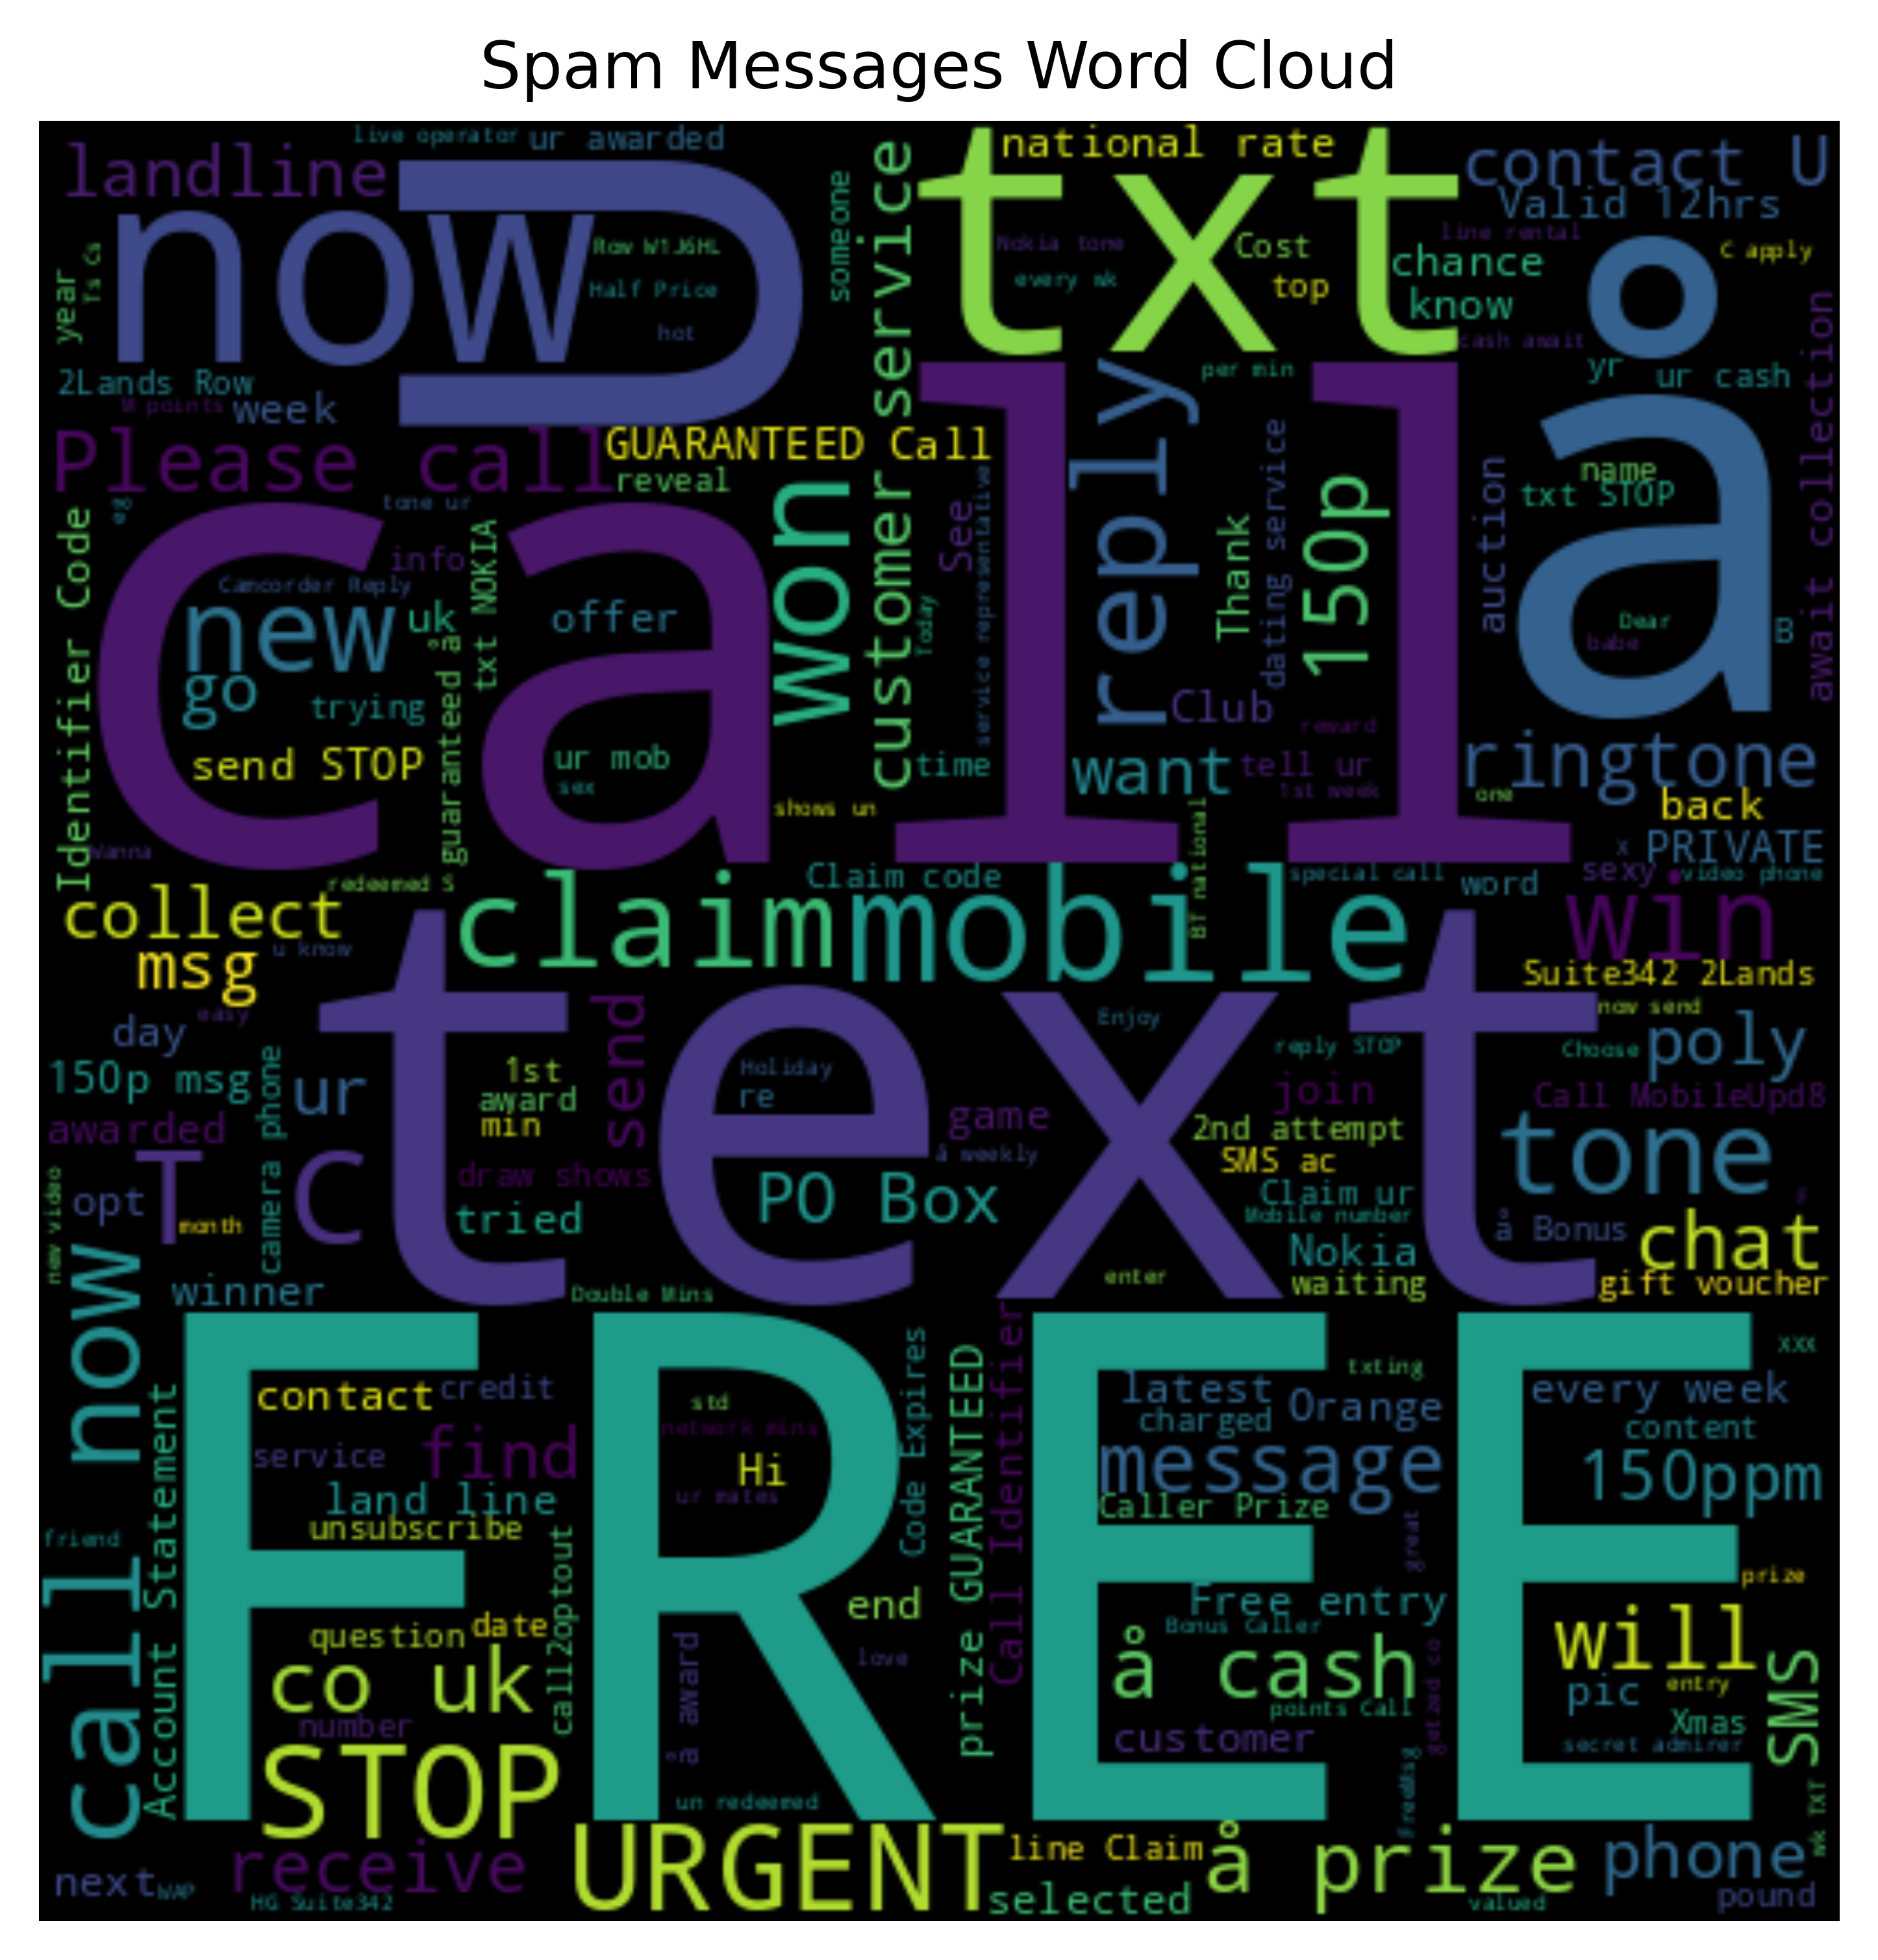

In [143]:
plt.figure(figsize=(12, 6), dpi=600)
plt.imshow(spam_image, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')
plt.show()

In [144]:
df['num_char']=df['text'].apply(len)

In [145]:
df['num_words']=df['text'].apply(lambda x: len(str(x).split()))

In [146]:
df['num_sen']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [147]:
df.describe()

num_char    num_words      num_sen
count  5572.000000  5572.000000  5572.000000
mean     80.118808    15.494436     1.991565
std      59.690841    11.329427     1.501427
min       2.000000     1.000000     1.000000
25%      36.000000     7.000000     1.000000
50%      61.000000    12.000000     1.500000
75%     121.000000    23.000000     2.000000
max     910.000000   171.000000    38.000000

In [148]:
df[df['label']=='ham'].describe()

num_char    num_words      num_sen
count  4825.000000  4825.000000  4825.000000
mean     71.023627    14.200622     1.832332
std      58.016023    11.424511     1.431214
min       2.000000     1.000000     1.000000
25%      33.000000     7.000000     1.000000
50%      52.000000    11.000000     1.000000
75%      92.000000    19.000000     2.000000
max     910.000000   171.000000    38.000000

In [149]:
df[df['label']=='spam'].describe()

num_char   num_words     num_sen
count  747.000000  747.000000  747.000000
mean   138.866131   23.851406    3.020080
std     29.183082    5.811898    1.538034
min     13.000000    2.000000    1.000000
25%    132.500000   22.000000    2.000000
50%    149.000000   25.000000    3.000000
75%    157.000000   28.000000    4.000000
max    224.000000   35.000000    9.000000

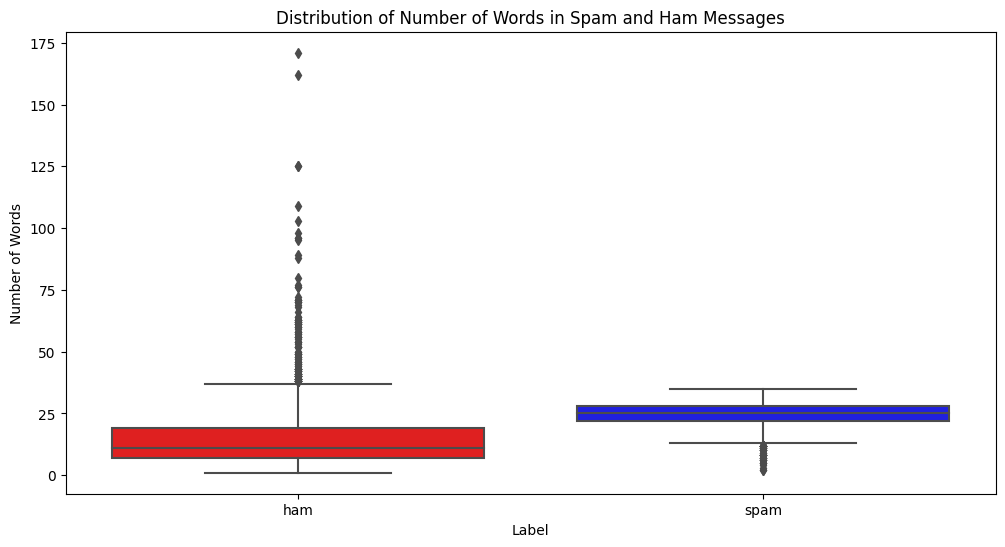

In [150]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='num_words', data=df, palette={'spam': 'blue', 'ham': 'red'})
plt.xlabel('Label')
plt.ylabel('Number of Words')
plt.title('Distribution of Number of Words in Spam and Ham Messages')
plt.show()

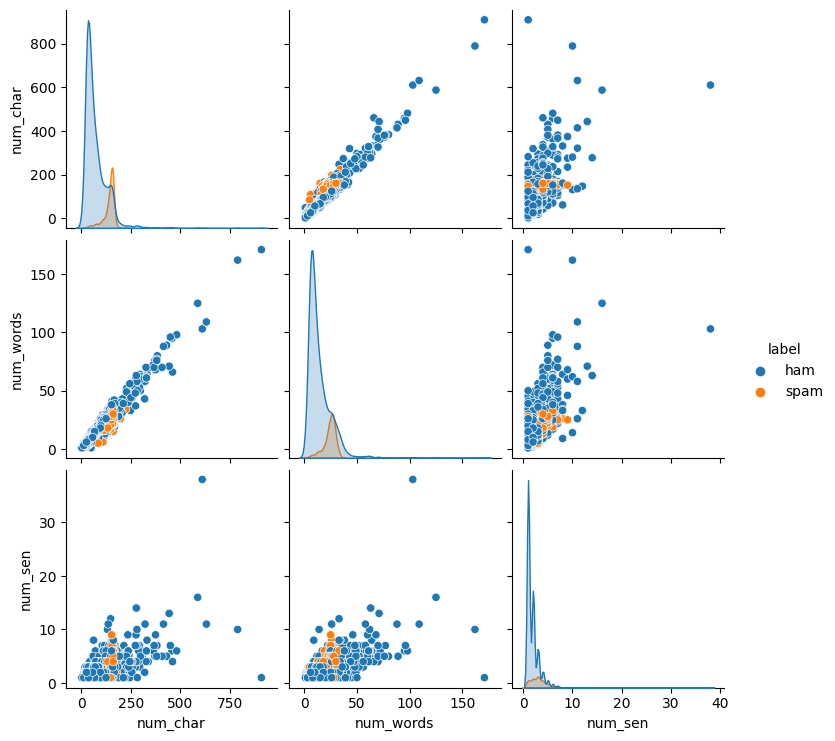

In [151]:
sns.pairplot(df,hue='label')
plt.show()

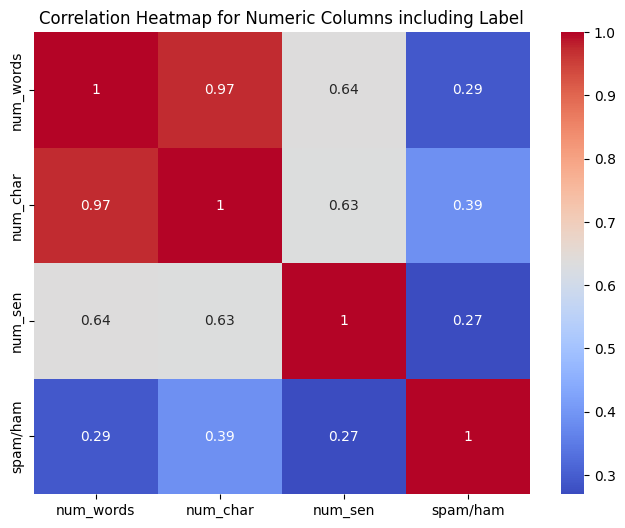

In [152]:
df['spam/ham'] = pd.get_dummies(df['label'], drop_first=True)
numeric_columns = ['num_words', 'num_char','num_sen', 'spam/ham']
subset_df = df[numeric_columns]

plt.figure(figsize=(8, 6))
sns.heatmap(subset_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numeric Columns including Label')
plt.show()

# **TEXT PREPROCESSING USING NLP TECHNIQUES**

In [153]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.stem import PorterStemmer
import string,time

In [154]:
def remove_website_links(text):
    no_website_links = text.replace(r"http\S+", "")
    return no_website_links

def remove_numbers(text):
    removed_numbers = text.replace(r'\d+','')
    return removed_numbers

def remove_emails(text):
    no_emails = text.replace(r"\S*@\S*\s?",'')
    return no_emails

In [155]:
df['text'] = df['text'].apply(remove_website_links)
df['text'] = df['text'].apply(remove_numbers)
df['text'] = df['text'].apply(remove_emails)

In [156]:
def transform_text(text):
    text=text.lower()

    lst=nltk.word_tokenize(text)
    
    l1=[]
    useless_words=stopwords.words('english')+list(string.punctuation)
    for word in lst:
        if word.isalnum()==True and word not in useless_words:
            l1.append(word)
                 
    l2=[]
    for word in l1:
        ps=PorterStemmer()
        l2.append(ps.stem(word))
        
    return " ".join(l2).strip()
    l1.clear()
    l2.clear()  

In [157]:
df['text'] = df['text'].apply(transform_text)
df['num_words_transform']=df['text'].apply(lambda x: len(str(x).split()))

In [158]:
df['label']=df['label'].replace({'spam':0,'ham':1})

In [159]:
spam_corpus = []
for msg in df[df['label'] == 1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

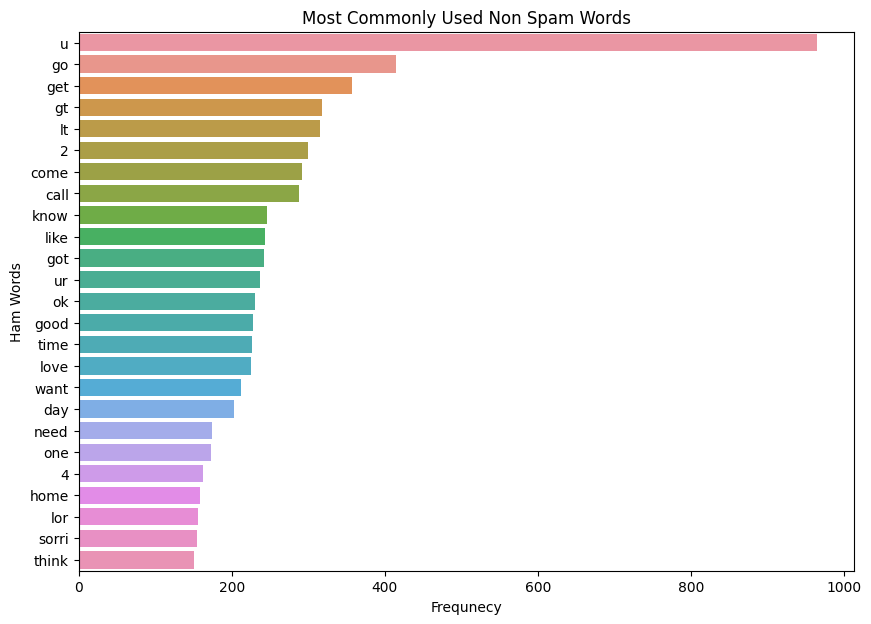

In [160]:
from collections import Counter
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(spam_corpus).most_common(25))[0],x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used Non Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Ham Words")
plt.show()

In [161]:
ham_corpus = []
for msg in df[df['label'] == 0]['text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

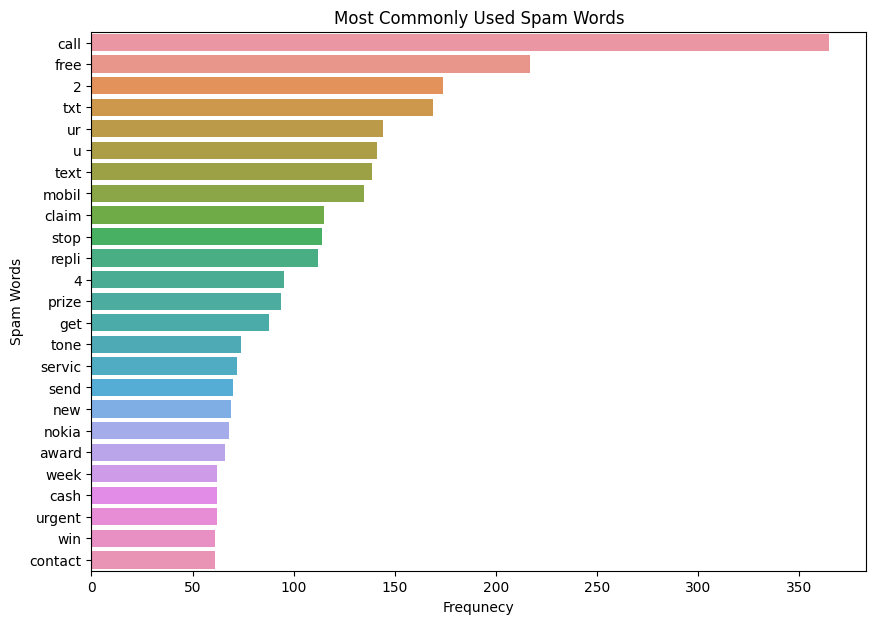

In [162]:
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(ham_corpus).most_common(25))[0],x=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Spam Words")
plt.show()

# **COMPARISON OF CHARACTERS BETWEEN HAM & SPAM TEXT**

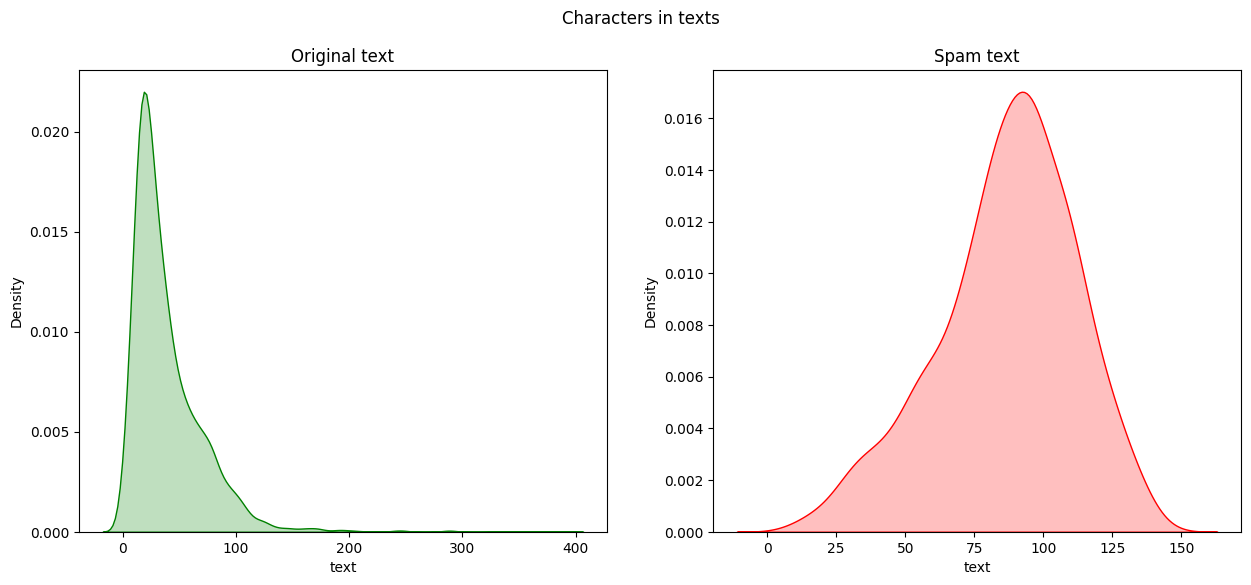

In [163]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.kdeplot(data=df[df['label']==1]['text'].str.len(), color='green', ax=ax1, fill=True)
ax1.set_title('Original text')
sns.kdeplot(data=df[df['label']==0]['text'].str.len(), color='red', ax=ax2, fill=True)
ax2.set_title('Spam text')
fig.suptitle('Characters in texts')
plt.show()


# **COMPARISON OF WORDS BETWEEN HAM & SPAM TEXT**

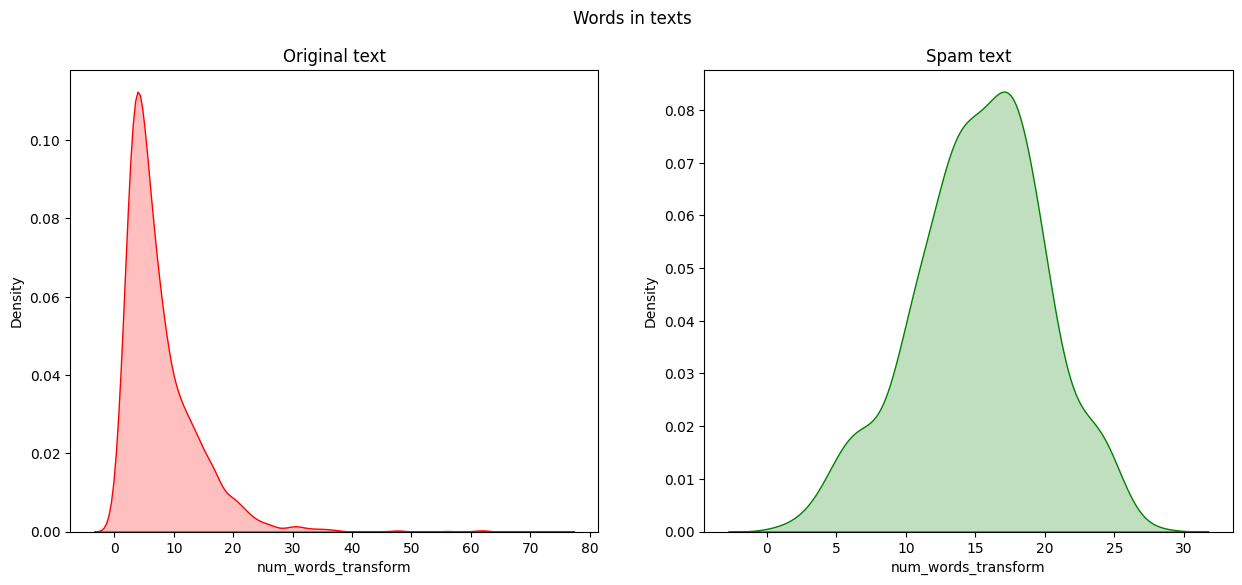

In [164]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.kdeplot(data=df[df['label']==1]['num_words_transform'], color='red', fill=True, ax=ax1)
ax1.set_title('Original text')
sns.kdeplot(data=df[df['label']==0]['num_words_transform'], color='green', fill=True, ax=ax2)
ax2.set_title('Spam text')
fig.suptitle('Words in texts')
plt.show()

Text(0.5, 0.98, 'Average word length in each text')

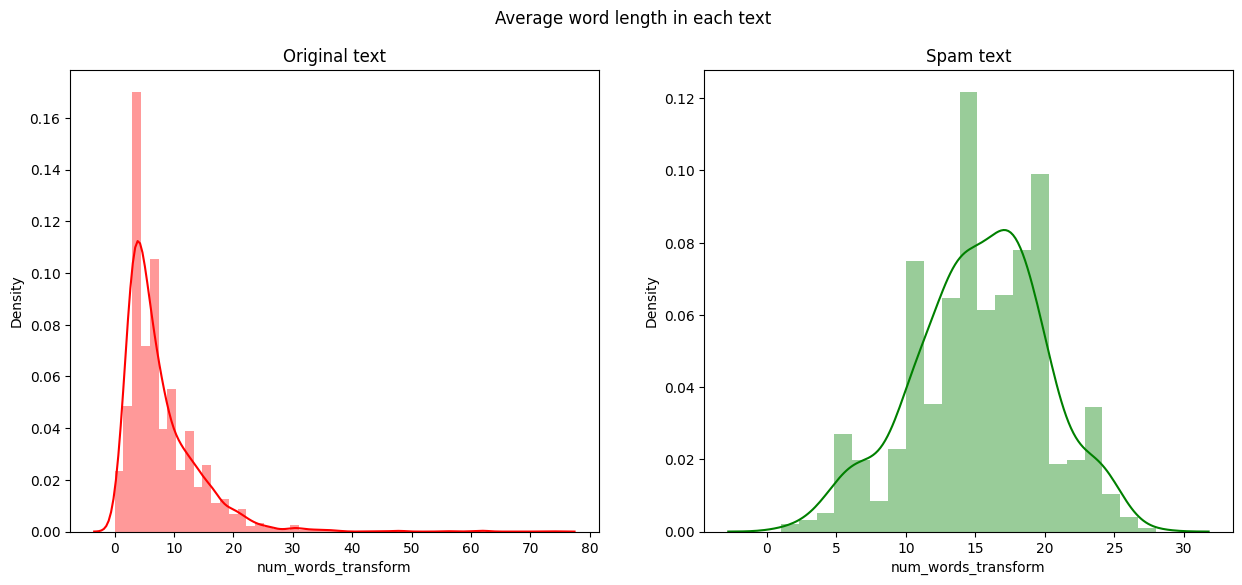

In [165]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
word=df[df['label']==1]['num_words_transform']
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df[df['label']==0]['num_words_transform']
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Spam text')
fig.suptitle('Average word length in each text')

In [166]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [167]:
X = tfidf.fit_transform(df['text']).toarray()
y = df['label'].values

In [168]:
X.shape

(5572, 3000)

# **MODEL TRAINING**

In [169]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [170]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [171]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

**GAUSSIAN NAIVE BAYES**

Accuracy Score - 0.8448430493273542
Precision Score - 0.9782608695652174


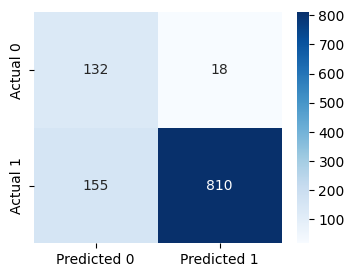

In [172]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred1)
print('Accuracy Score -',accuracy_gnb)
precision_gnb = precision_score(y_test, y_pred1)
print('Precision Score -',precision_gnb)
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.show()

**MULTINOMIAL NAIVE BAYES**

Accuracy Score - 0.9748878923766816
Precision Score - 0.9718026183282981


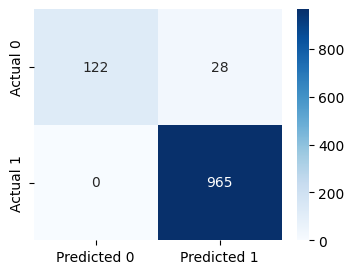

In [173]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred2)
print('Accuracy Score -',accuracy_mnb)
precision_mnb = precision_score(y_test, y_pred2)
print('Precision Score -',precision_mnb)
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.show()

**SUPPORT VECTOR MACHINE**

Accuracy Score - 0.9739910313901345
Precision Score - 0.9727272727272728


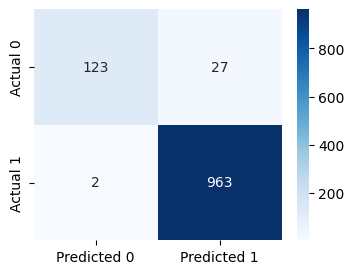

In [174]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('Accuracy Score -',accuracy_svm)
precision_svm = precision_score(y_test, y_pred_svm)
print('Precision Score -',precision_svm)
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.show()

**KNN**

Accuracy Score - 0.9201793721973094
Precision Score - 0.9155597722960152


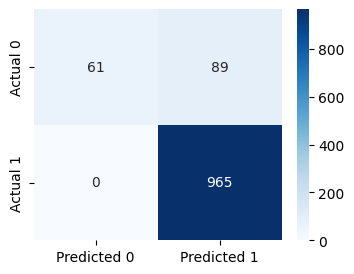

In [175]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy Score -',accuracy_knn)
precision_knn = precision_score(y_test, y_pred_knn)
print('Precision Score -',precision_knn)
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.show()

**LOGISTIC REGRESSION**

Accuracy Score - 0.947085201793722
Precision Score - 0.9449901768172888


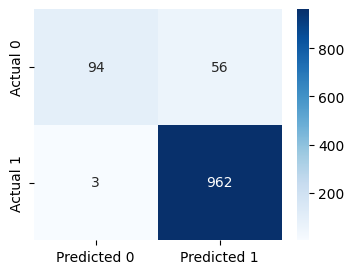

In [176]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print('Accuracy Score -',accuracy_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
print('Precision Score -',precision_logreg)

cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.show()

**DECISION TREE**

Accuracy Score - 0.9623318385650225
Precision Score - 0.9792315680166147


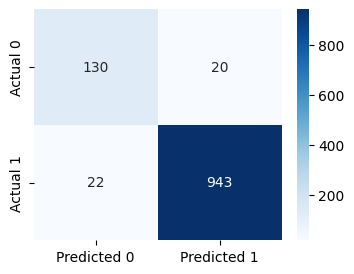

In [177]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy Score -',accuracy_dt)
precision_dt = precision_score(y_test, y_pred_dt)
print('Precision Score -',precision_dt)
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.show()

**RANDOM FOREST**

Accuracy Score - 0.9775784753363229
Precision Score - 0.9747474747474747


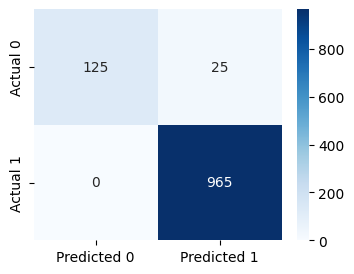

In [178]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy Score -',accuracy_rf)
precision_rf = precision_score(y_test, y_pred_rf)
print('Precision Score -',precision_rf)
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.show()

In [179]:
model_names = ['Gaussian Naive Bayes','Multinomial Naive Bayes', 'SVM', 'KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_scores = [accuracy_gnb, accuracy_mnb, accuracy_svm, accuracy_knn, accuracy_logreg, accuracy_dt, accuracy_rf]
precision_scores = [precision_gnb, precision_mnb, precision_svm, precision_knn, precision_logreg, precision_dt, precision_rf]

results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print(results_df)

                     Model  Accuracy  Precision
6            Random Forest  0.977578   0.974747
1  Multinomial Naive Bayes  0.974888   0.971803
2                      SVM  0.973991   0.972727
5            Decision Tree  0.962332   0.979232
4      Logistic Regression  0.947085   0.944990
3                      KNN  0.920179   0.915560
0     Gaussian Naive Bayes  0.844843   0.978261


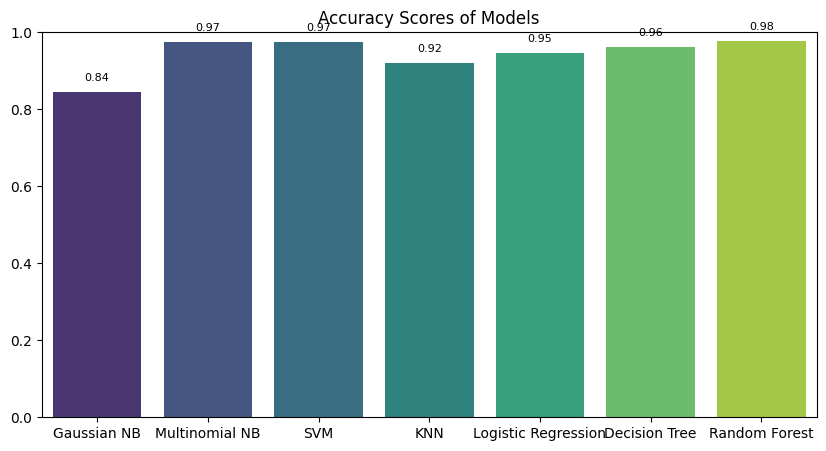

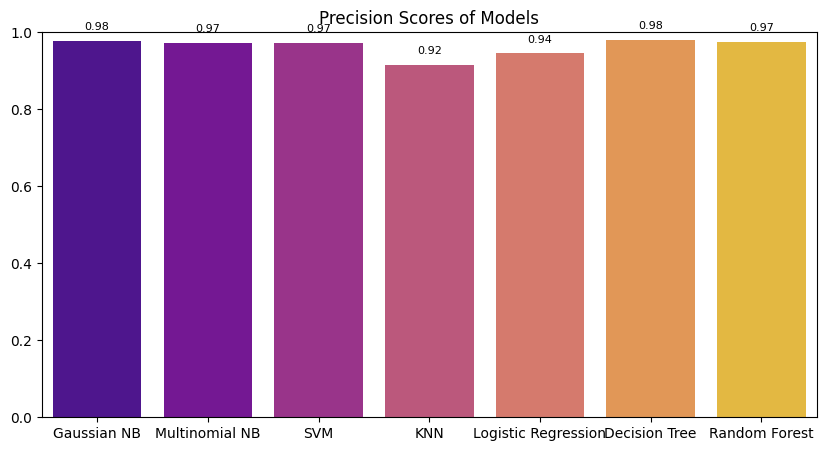

In [180]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=['Gaussian NB','Multinomial NB','SVM', 'KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest'],
            y=accuracy_scores, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')
plt.title('Accuracy Scores of Models')
plt.ylim(0, 1.0)
plt.show()

plt.figure(figsize=(10, 5))
bx = sns.barplot(x=['Gaussian NB','Multinomial NB','SVM', 'KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest'],
            y=precision_scores, palette='plasma')
for p in bx.patches:
    bx.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')
plt.title('Precision Scores of Models')
plt.ylim(0, 1.0)
plt.show()